## Basic Imports

In [1]:
# Importing necessary libraries
import numpy as np        # For numerical operations
import pandas as pd       # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
%matplotlib inline

# Importing WordCloud for text visualization
from wordcloud import WordCloud

# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sneha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Read the CSV file
df = pd.read_csv('cyberbullying_tweets.csv')

# Display the first few rows of the DataFrame
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [4]:
# Rename the columns name
df.rename(columns = {'cyberbullying_type': 'target', 'tweet_text': 'text'}, inplace = True)
df.head()

,text,target
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


## Data Preprocessing

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df.head(20)

,text,target
0,"In other words #katandandre, your food was cra...",3
1,Why is #aussietv so white? #MKR #theblock #ImA...,3
2,@XochitlSuckkks a classy whore? Or more red ve...,3
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3
4,@RudhoeEnglish This is an ISIS account pretend...,3
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",3
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,3
7,Karma. I hope it bites Kat on the butt. She is...,3
8,@stockputout everything but mostly my priest,3
9,Rebecca Black Drops Out of School Due to Bully...,3


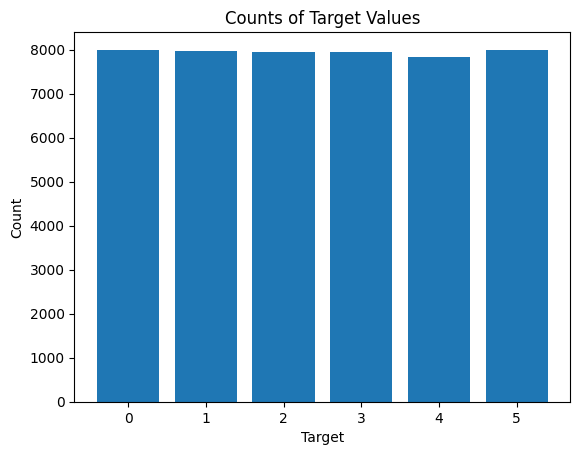

In [16]:
counts = df['target'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Counts of Target Values')
plt.show()

In [8]:
#check duplicate values
df.duplicated().sum()

36

In [9]:
len(df)

47692

In [10]:
#remove Duplicate
df = df.drop_duplicates(keep = 'first')
len(df)

47656

## Feature Engg

In [17]:
# Importing the Porter Stemmer for text stemming
from nltk.stem.porter import PorterStemmer

# Importing the string module for handling special characters
import string

# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

In [18]:
# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [19]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [20]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,text,target,transformed_text
0,"In other words #katandandre, your food was cra...",3,word katandandr food crapilici mkr
1,Why is #aussietv so white? #MKR #theblock #ImA...,3,aussietv white mkr theblock imacelebrityau tod...
2,@XochitlSuckkks a classy whore? Or more red ve...,3,xochitlsuckkk classi whore red velvet cupcak
3,"@Jason_Gio meh. :P thanks for the heads up, b...",3,meh p thank head concern anoth angri dude twitter
4,@RudhoeEnglish This is an ISIS account pretend...,3,rudhoeenglish isi account pretend kurdish acco...


In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer(max_features = 500)

In [22]:
X = tfid.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

## Model Training

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [34]:
# svc = SVC(kernel= "sigmoid", gamma  = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2 )
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)    
xgb  = XGBClassifier(n_estimators = 50, random_state = 2)

In [35]:
clfs = {
    # 'SVC': svc,
    'KNN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'Adaboost': abc,
    'Bgc': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
    
}

## Model Evaluation

In [36]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clfs, X_train, y_train, X_test, y_test):
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='macro')
    return accuracy , precision

In [38]:
accuracy_scores = []
precision_scores = []
for name , clfs in clfs.items():
    current_accuracy, current_precision = train_classifier(clfs, X_train, y_train, X_test, y_test)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For:  KNN
Accuracy:  0.5894880402853546
Precision:  0.710329600308091

For:  NB
Accuracy:  0.7434955937893412
Precision:  0.7309804638717506

For:  DT
Accuracy:  0.6326059588753672
Precision:  0.8095919874112764

For:  LR
Accuracy:  0.8160931598825011
Precision:  0.8195558510555174

For:  RF
Accuracy:  0.8072807385648343
Precision:  0.8112570420219828


c:\Users\Sneha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



For:  Adaboost
Accuracy:  0.7872429710449014
Precision:  0.8017945178557899

For:  Bgc
Accuracy:  0.7985732270247587
Precision:  0.8035278526418499

For:  ETC
Accuracy:  0.8045530843474612
Precision:  0.8050402551000286

For:  GBDT
Accuracy:  0.8146244229962233
Precision:  0.8418908066238914

For:  xgb
Accuracy:  0.8235417540914813
Precision:  0.8395875687155088
